In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import diymcmc


We've written a convenience function to grab the test data:

In [5]:
x,y,sigma_y = diymcmc.get_data1()

Start by plotting the data -- just make an `errorbar()` plot with the provided data.

[ 9.80602906  1.92413408  0.69817509  1.64791747  9.69062033  0.23115729
  4.73789589  2.27713428  6.16194938  4.80375187  4.71745821  7.06119318
  5.30108679  1.46165884  2.01562124  2.6186184   9.42697095  3.59911453
  6.45915251  8.37594921  7.78562906  4.75363884  2.686037    5.72290324
  6.79881177  2.38032399  0.50913421  1.24518858  1.80480921  1.33675464
  2.77750087  3.50485568  7.09529919  4.81060404  0.51925984  8.04860547
  9.2452808   8.52206555  1.18351409  1.71672952  5.06470842  8.17352545
  5.94364369  9.51623076  1.20843413  1.38419241  0.38955952  7.4902482
  7.34038969  0.2489162 ]
[ 11.29875307  11.41411262   9.59927316  10.01910454  10.49066646
   9.87818199  10.74781541   9.40462326  10.81944945   9.77560214
   9.82713203   9.87727259   9.98850476  10.81259293   9.65047802
   9.26339302  11.49426917  11.72483813  10.62654593  11.64163386
  11.10264105  11.00591574   9.57985171  11.01072896  12.04404596
  11.35779377   9.415602    10.06361006  10.95874676  10.3845

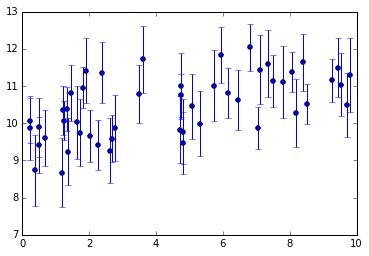

In [6]:
# MAKE PLOT
print x
print y

plt.scatter(x,y)
plt.errorbar(x,y,sigma_y, linestyle='None')
plt.xlim(0,10)
plt.savefig('MCMC.pdf')

What model should we use for the data? Why? Create a function to evaluate this model for a given choice of parameters and `x` data:

In [7]:
def model(pars, x):
    # the `pars` argument is a list of parameter values, e.g., pars = [m, b] for a line
    m,b = pars
    print pars
    print x
    y_val= m*x + b
    return y_val
    pass

---

We'll start with the assumption that the data are independent and identically distributed so that the likelihood is simply a product of Gaussians (one big Gaussian). We'll also assume that the uncertainties reported are correct, and that there are no uncertainties on the `x` data. We need to define a function that will evaluate the (ln)likelihood of the data, given a particular choice of your model parameters. A good way to structure this function is as follows:

In [8]:
def ln_likelihood(pars, x, y, y_unc):
    # we will pass the parameters (pars) to the model function
    # the other arguments are the data
    m,b = pars
    print pars
    y_val= m*x + b
    lnlike= -0.5* np.sum((y-y_val)**2/sigma_y**2))
    return lnlike
    pass 

What about priors? Remember your prior only depends on the model parameters, but be careful about what kind of prior you are specifying for each parameter. Do we need to properly normalize the probabilities?

In [ ]:
def ln_prior(pars):
    m,b = pars
    x= 1
    y= np.log(x)
    return y
    #idk what toreturn y do here but i think i have to set different values for bot.h m and b
    #if blah < m and BLAH < b
        #return 
    #return -np.inf
    pass

Now we can define a function that evaluates the (ln)posterior probability, which is just the sum of the ln prior and ln likelihood:

In [ ]:
def ln_posterior(pars, x, y, y_unc):
    return ln_prior(pars) + ln_likelihood(pars, x, y, y_unc)

Now write a function to actually run a Metropolis-Hastings MCMC sampler. Ford (2005) includes a great step-by-step walkthrough of the Metropolis-Hastings algorithm, and we'll base our code on that

In [ ]:
def run_mcmc(ln_posterior, nsteps, ndim, p0, stepsize, args=()):
    
    # Set up the chain, and initialize it
   
    
    # Set up an array to hold the probabilities at each step
    
    # Calculate the probability for the first step
    
    # Loop for nsteps
    for i in np.linspace(1,nsteps-1,nsteps-1):
        # Randomly choose new model parameters for the trial state
        
        # Calculate the probability for the new state
        
        # Compare it to the probability of the old state
        # Using the acceptance probability function
        
        # Chose a random number u between 0 and 1 to compare with p_accept
        
        # If p_accept>1 or p_accept>u, accept the step
            # Save the position to the chain
            
            # Save the probability to that array
            
        # Else, do not accept the step
            # Set the position and probability are equal to the last value
            
    # Return the chain and probabilities

Now run the MCMC code on the data provided.

In [ ]:
# run it!

Plot the position of the walker as a function of step number for each of the parameters. Are the chains converged? 

Make histograms of the samples for each parameter. Should you include all of the samples? 

Report to us your constraints on the model parameters -- you have some freedom in interpreting what this means...